# Part 1. 
## Question: Apa yang Anda ketahui mengenai Object Recognition, Hand Gesture Recognition/Tracking, Human Tracking (Skeleton), Human Object Interaction? Jelaskan selengkap-lengkapnya.

Let's see the difference(s) between those concepts mentioned above:
- Object recognition: In general, object recognition is a machine learning task that focuses on both detecting & recognizing multiple objects in a scene. There have been a lot of research and competitions regarding this topic that researchers can publish their works and results publicly. 

- Hand gesture recognition/tracking: This particular recognition task is directed towards both hands (including palm and fingers). The problem becomes more complex due to the tracking task. Now the machine learning model do not just recognize hands but also keep track of them. In case of gesture recognition, the machine learning model will learn how to recognize and distinguish different gestures (e.g. gesture for the mutes).

- Human tracking (skeleton): Human tracking is similar to human detection but not necessarily recognizing who's the person is. The model will draw lines along the body to estimate human body po

- Human objection interaction: Human object interaction is a relatively new machine learning task that the goal is identify interactions between humans activity perform on objects.

# Part 2. Human Object Interaction (Coding)

In [13]:
import numpy as np
import cv2

import matplotlib.pyplot as plt

import yolo3_one_file_to_detect_them_all as yolo3
%matplotlib inline

In [2]:
# initiate YOLOV3 model
model = yolo3.make_yolov3_model()
weight_reader = yolo3.WeightReader('./data/yolov3.weights')
weight_reader.load_weights(model)

loading weights of convolution #0
loading weights of convolution #1
loading weights of convolution #2
loading weights of convolution #3
no convolution #4
loading weights of convolution #5
loading weights of convolution #6
loading weights of convolution #7
no convolution #8
loading weights of convolution #9
loading weights of convolution #10
no convolution #11
loading weights of convolution #12
loading weights of convolution #13
loading weights of convolution #14
no convolution #15
loading weights of convolution #16
loading weights of convolution #17
no convolution #18
loading weights of convolution #19
loading weights of convolution #20
no convolution #21
loading weights of convolution #22
loading weights of convolution #23
no convolution #24
loading weights of convolution #25
loading weights of convolution #26
no convolution #27
loading weights of convolution #28
loading weights of convolution #29
no convolution #30
loading weights of convolution #31
loading weights of convolution #32

In [3]:
net_h, net_w = 416, 416 # input width & height
obj_thresh, nms_thresh = 0.5, 0.45 # threshold values
anchors = [[116,90,  156,198,  373,326],  [30,61, 62,45,  59,119], [10,13,  16,30,  33,23]] # player anchors
labels = ["person", "bicycle", "car", "motorbike", "aeroplane", "bus", "train", "truck", \
              "boat", "traffic light", "fire hydrant", "stop sign", "parking meter", "bench", \
              "bird", "cat", "dog", "horse", "sheep", "cow", "elephant", "bear", "zebra", "giraffe", \
              "backpack", "umbrella", "handbag", "tie", "suitcase", "frisbee", "skis", "snowboard", \
              "sports ball", "kite", "baseball bat", "baseball glove", "skateboard", "surfboard", \
              "tennis racket", "bottle", "wine glass", "cup", "fork", "knife", "spoon", "bowl", "banana", \
              "apple", "sandwich", "orange", "broccoli", "carrot", "hot dog", "pizza", "donut", "cake", \
              "chair", "sofa", "pottedplant", "bed", "diningtable", "toilet", "tvmonitor", "laptop", "mouse", \
              "remote", "keyboard", "cell phone", "microwave", "oven", "toaster", "sink", "refrigerator", \
              "book", "clock", "vase", "scissors", "teddy bear", "hair drier", "toothbrush"] # YOLOV3 pre-trained labels

(1000, 1500, 3)


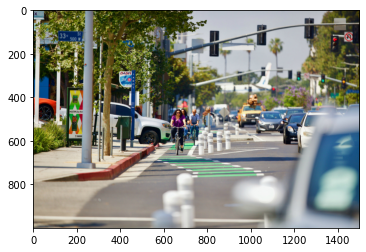

In [38]:
PATH = './data/test.jpg'
scaling_factor = 1

img = cv2.imread(PATH)
print(img.shape)
new_h, new_w = int(img.shape[1]*scaling_factor), int(img.shape[0]*scaling_factor)
img = cv2.resize(img, (new_h, new_w), interpolation=cv2.INTER_AREA)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
h, w, _ = img.shape

plt.imshow(img)
plt.show()

car: 58.8719367980957%
person: 90.89049696922302%
car: 80.79244494438171%
car: 53.601717948913574%
traffic light: 92.41534471511841%
traffic light: 95.10249495506287%
traffic light: 86.1046850681305%
traffic light: 71.24623656272888%
traffic light: 59.670066833496094%
traffic light: 97.75428175926208%
traffic light: 95.565664768219%
traffic light: 66.59331917762756%
traffic light: 78.62460613250732%
person: 55.68259954452515%
car: 56.03252053260803%
truck: 52.53385901451111%
car: 89.61634635925293%
bicycle: 51.286208629608154%


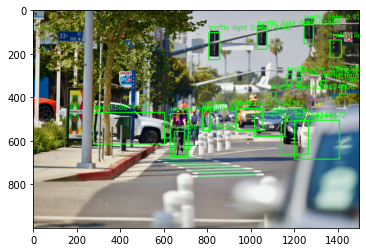

In [39]:
img_copy = yolo3.preprocess_input(img, net_h, net_w)
preds = model.predict(img_copy)
bboxes = []

for i in range(len(preds)):
    bboxes += yolo3.decode_netout(preds[i][0], anchors[i], obj_thresh, nms_thresh, net_h, net_w)

yolo3.correct_yolo_boxes(bboxes, h, w, net_h, net_w)
yolo3.do_nms(bboxes, nms_thresh)
obj = yolo3.draw_boxes(img, bboxes, labels, obj_thresh)

plt.imshow(img)

plt.show()